In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('processed.csv', quoting=pd.QUOTE_NONNUMERIC, on_bad_lines='skip')


In [4]:
data.head()

,Password,Strength_Level,length,capital,small,special,numeric,entropy,has_sequence,char_diversity,char_distribution
0,acomia=}xg,3,10,0,8,2,0,3.121928,0,0.900000,0.769231
1,acopyrin:0,3,10,0,8,1,1,3.321928,0,1.000000,0.751889
2,jjjj4acclinal,1,13,0,12,0,1,2.623517,0,0.538462,0.702703
3,#acetanning,2,11,0,10,1,0,2.845351,0,0.727273,0.709677
4,Oachromate;,2,11,1,9,1,0,3.277613,0,0.909091,0.744691


In [5]:
y = data['Strength_Level'].values
x = data[['length','capital','small','special','numeric',
          'entropy', 'has_sequence','char_diversity', 'char_distribution']].values

In [7]:
print("Feature matrix shape:", x.shape)

Feature matrix shape: (1298045, 9)


In [8]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.2, random_state=42)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(1038436, 9) (1038436,)
(259609, 9) (259609,)


In [9]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [10]:
model = MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=500)  # Increased size and iterations
model.fit(xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=500)

In [11]:
ypred = model.predict(xtest)

In [12]:
print("The accuracy of the model is: ", accuracy_score(ytest, ypred) * 100, " % !!!")

The accuracy of the model is:  93.89813142071345  % !!!


In [13]:

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51905
           1       0.93      0.95      0.94     51907
           2       0.86      0.92      0.89     51777
           3       0.91      0.83      0.87     52039
           4       1.00      1.00      1.00     51981

    accuracy                           0.94    259609
   macro avg       0.94      0.94      0.94    259609
weighted avg       0.94      0.94      0.94    259609



In [14]:
print("The confusion matrix is: ")
cf = confusion_matrix(ytest, ypred)
print(cf)

The confusion matrix is: 
[[51876    25     4     0     0]
 [  171 49269   742  1725     0]
 [    0  1734 47688  2355     0]
 [    0  1932  7153 42954     0]
 [    0     0     0     0 51981]]


In [15]:
import joblib
joblib.dump(sc, 'scaler_enhanced.pkl')
joblib.dump(model, 'model_enhanced.pkl')

['model_enhanced.pkl']

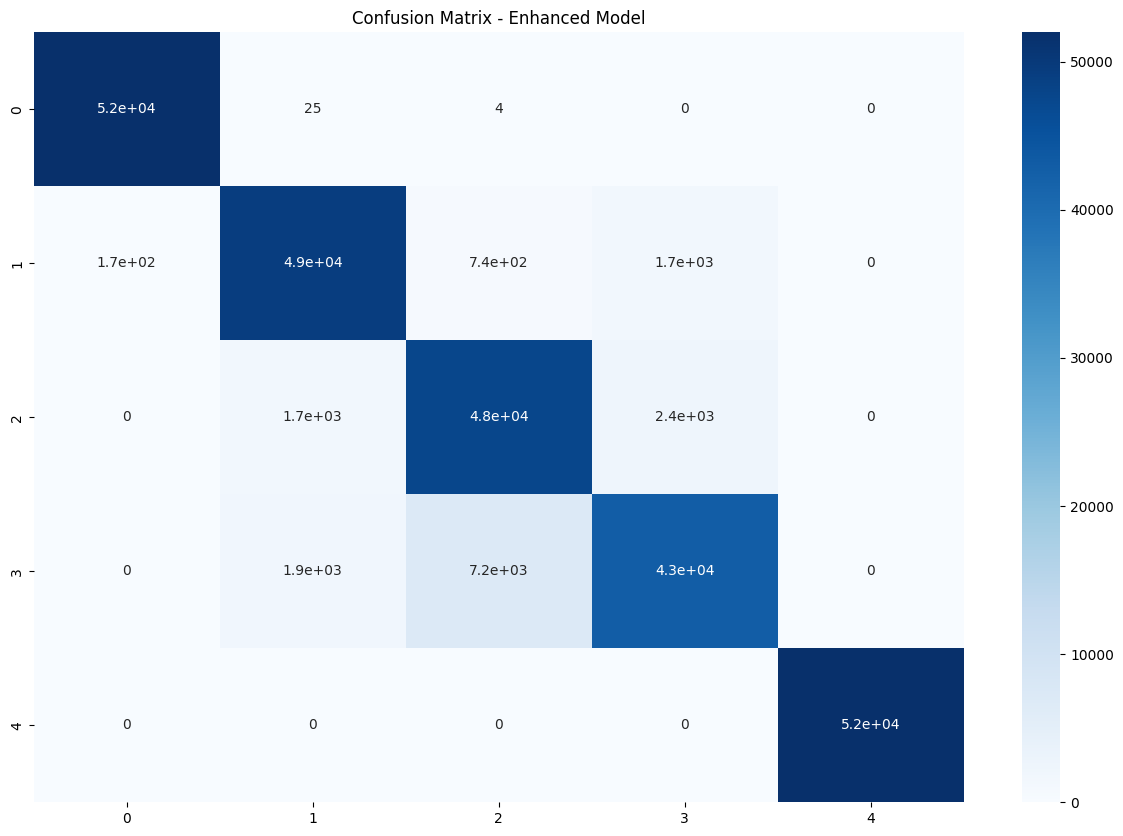

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(cf, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Enhanced Model')
plt.savefig('confusion_enhanced.jpg')
plt.show()